### Курсовой проект

In [36]:
import numpy as np
import pandas as pd

### Загрузка датасета

https://www.kaggle.com/datasets/alexeyleshchenko/moscow-apartment-listings

In [37]:
moscow = pd.read_csv(r"C:\Users\kutsevichoi\Downloads\moscow_apartment_listings.csv")

### Оригинал описания датасета

Moscow apartment listings w/prices

Price - Listed price in Russian roubles

repair - Condition: 1 - worst, 4 - best

year_built_empty - "1" if we know the year of construction

house_age - 2020 - the year of construction

closest_subway - id of the closest subway station

dist_to_subway - Distance to the closest subway in meters

sg - Subway grade: 0 - Underground 1 - Urban rail (CMK) 2 - Suburban rail (MKD) 3 - Monorail (light rail)

lat - Latitude

lon - Longitude

subway_dist_to_center - Distance of the closest subway to the city center in meters

h3 - Uber's H3 geospatial code

agent_offers - Number of listings by the same agent

subway_offers - Number of listings in the vicinity of the same subway station

address_offers - Number of listings at the same address

rooms - Number of rooms

footage - Total footage in square meters

floor - The floor on which the apartment is situated

max_floor - Total floors in the building

first_floor - "1" if the apartment is on the first floor

last_floor - "1" if the apartment is on the top floor

AO - District (административный округ)

hm - Material from which the building is built

### Перевод описания датасета

Объявления о продаже квартир в Москве с ценами

price - Стоимость в российских рублях

repair - Состояние (ремонт) в квартире от наихудшего: 1 до лучшего: 4

year_build_empty - Наличие информации о годе постройки
"1", если мы знаем год постройки

house_age - Возраст здания: 2020 минус год строительства здания

closest_subway - Близжайшее метро, указанное через идентификатор

dist_to_subway - Расстояние до ближайшего метро в метрах

sg - Тип метро: 0 - Подземное 1 - Городская железная дорога (МЦК) 2 - Пригородная железная дорога (РЖД) 3 - монорельсовая дорога (Монорельс)

lat - Широта

lon - Долгота

subway_dist_to_center - Дальность ближайшего метро до центра города в метрах

h3 - Геопространственный код H3 от Uber

agent_offers - Количество объявлений от одного и того же агента

subway_offers - Количество объявлений в непосредственной близости от одной и той же станции метро

address_offers - Количество объявлений по одному и тому же адресу

rooms - Количество комнат

footage - Метраж (общая площадь в квадратных метрах)

floor - Этаж, на котором расположена квартира

max_floor - Общее количество этажей в здании

first_floor - "1", если квартира находится на первом этаже

last_floor - "1", если квартира находится на верхнем этаже

AO - Район (административный округ)

hm - Тип здания (панельное, кирпичное, монолитное, блочное)

### Ознакомление с содержимым датасета

In [38]:
moscow.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [39]:
moscow.shape

(12181, 22)

In [40]:
moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

### Изменение типа переменных в датасете

In [41]:
moscow['repair'] = moscow['repair'].astype(str)
moscow['year_built_empty'] = moscow['year_built_empty'].astype(bool)
moscow['closest_subway'] = moscow['closest_subway'].astype(str)
moscow['sg'] = moscow['sg'].astype(str)
moscow['lat'] = moscow['lat'].astype(str)
moscow['lon'] = moscow['lon'].astype(str)
moscow['first_floor'] = moscow['first_floor'].astype(bool)
moscow['last_floor'] = moscow['last_floor'].astype(bool)

In [42]:
moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  object 
 2   year_built_empty       12181 non-null  bool   
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  object 
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  object 
 7   lat                    12181 non-null  object 
 8   lon                    12181 non-null  object 
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

### Задание целевого параметра модели

In [43]:
y = moscow.price
y.head()

0     8000000
1     7200000
2    10300000
3     8500000
4     9000000
Name: price, dtype: int64

### Задание массива данных для построения модели

In [44]:
X = moscow.drop(columns='price')
X.head()

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,h3,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,3,False,42,59,960,0.0,55.60900899999999,37.734632,17166,861181b6fffffff,...,5,1.0,1,39.4,11,12,False,False,UAO,panel
1,2,False,43,59,802,0.0,55.60876,37.741936,17166,861181b4fffffff,...,9,1.0,1,35.6,2,9,False,False,UAO,panel
2,2,False,43,59,638,0.0,55.6102066,37.7424953,17166,861181b4fffffff,...,9,2.0,2,53.0,5,12,False,False,UAO,panel
3,2,False,43,59,929,0.0,55.6240169,37.7403735,17166,861181b6fffffff,...,5,1.0,2,44.1,8,9,False,False,UAO,panel
4,2,False,43,59,785,0.0,55.6091073,37.74043,17166,861181b4fffffff,...,5,1.0,2,44.2,6,9,False,False,UAO,panel


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   repair                 12181 non-null  object 
 1   year_built_empty       12181 non-null  bool   
 2   house_age              12181 non-null  int64  
 3   closest_subway         12181 non-null  object 
 4   dist_to_subway         12181 non-null  int64  
 5   sg                     12181 non-null  object 
 6   lat                    12181 non-null  object 
 7   lon                    12181 non-null  object 
 8   subway_dist_to_center  12181 non-null  int64  
 9   h3                     12181 non-null  object 
 10  agent_offers           12181 non-null  int64  
 11  subway_offers          12181 non-null  int64  
 12  address_offers         12181 non-null  float64
 13  rooms                  12181 non-null  int64  
 14  footage                12181 non-null  float64
 15  fl

### Загрузка шаблона с модулями

In [46]:
import numpy as np
import pandas as pd
import random
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
matplotlib.rcParams.update({'font.size': 14})

### Создание функции вывода результатов работы модели в виде графиков

In [49]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Разбиение датасета на тренировочный и тестовый

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
X_train.shape

(9744, 21)

In [52]:
X_test.shape

(2437, 21)

In [53]:
y_train.shape

(9744,)

In [54]:
y_test.shape

(2437,)

In [55]:
X_test.tail(5)

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,h3,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
3447,2,False,58,139,1078,0.0,55.67466700000001,37.487713,10917,8611aa7b7ffffff,...,7,1.0,2,46.0,1,5,True,False,ZAO,panel
5042,3,False,43,16,1794,0.0,55.859302,37.504942,14800,8611aa707ffffff,...,8,1.0,2,58.0,2,17,False,False,SAO,panel
467,2,False,46,158,882,1.0,55.763933,37.736195,8355,8611aa617ffffff,...,4,1.0,1,37.5,5,14,False,False,VAO,brick
6380,2,False,50,122,1230,0.0,55.790825,37.47907,8949,8611aa717ffffff,...,6,1.0,1,34.0,8,9,False,False,SZAO,brick
8066,4,False,51,151,1026,0.0,55.861105,37.64024600000001,11734,8611aa627ffffff,...,9,1.0,1,36.0,12,12,False,True,SVAO,block


### Анализ данных

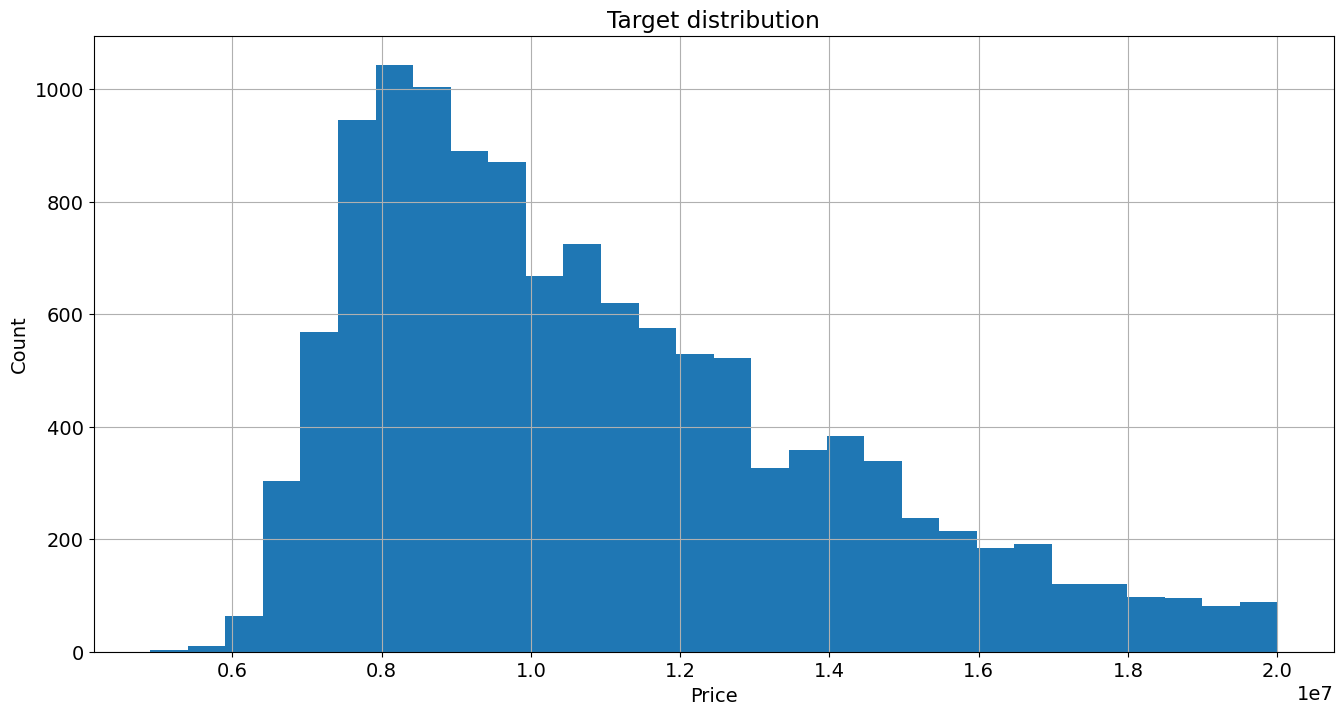

In [56]:
plt.figure(figsize = (16, 8))

moscow['price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [57]:
X_train.describe()

,house_age,dist_to_subway,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,36.159483,930.863608,11970.867200,25.111966,10.132594,1.283251,1.598009,46.077247,6.899528,13.520731
std,21.348485,533.726228,4718.323703,61.231197,7.058375,0.724509,0.490325,10.535780,5.344545,6.462310
min,0.000000,11.000000,1402.000000,0.000000,1.000000,1.000000,1.000000,30.100000,1.000000,2.000000
25%,16.000000,550.000000,8635.000000,1.000000,5.000000,1.000000,1.000000,38.000000,3.000000,9.000000
50%,42.000000,819.000000,12430.000000,1.000000,8.000000,1.000000,2.000000,44.400000,5.000000,12.000000
75%,53.000000,1183.250000,14840.000000,11.000000,13.000000,1.000000,2.000000,53.300000,10.000000,17.000000
max,130.000000,2988.000000,24636.000000,292.000000,40.000000,9.000000,2.000000,89.900000,38.000000,39.000000


In [58]:
y_train.describe()

count    9.744000e+03
mean     1.085110e+07
std      3.032246e+06
min      4.900000e+06
25%      8.478750e+06
50%      1.020000e+07
75%      1.265000e+07
max      2.000000e+07
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'house_age'}>,
        <AxesSubplot:title={'center':'dist_to_subway'}>,
        <AxesSubplot:title={'center':'subway_dist_to_center'}>],
       [<AxesSubplot:title={'center':'agent_offers'}>,
        <AxesSubplot:title={'center':'subway_offers'}>,
        <AxesSubplot:title={'center':'address_offers'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'footage'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'max_floor'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

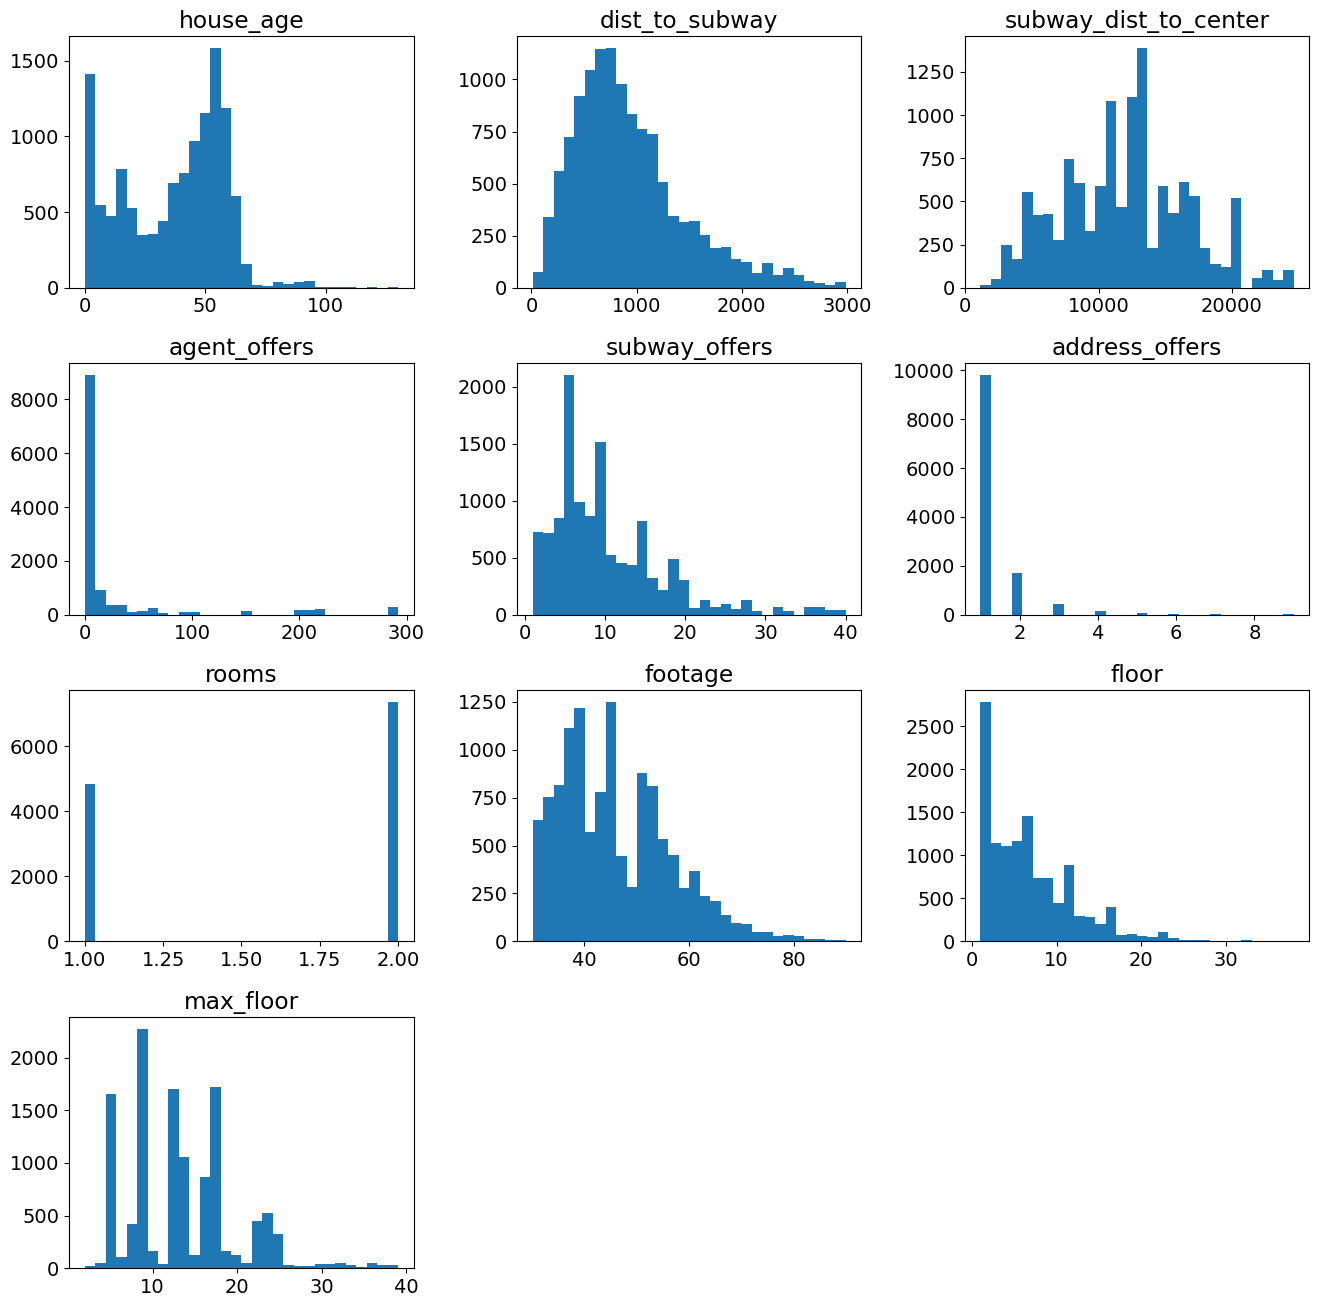

In [59]:
X.hist(figsize=(16,16), bins=30, grid=False)

### Номинативные переменные

In [60]:
moscow.select_dtypes(include='object').columns.tolist()

['repair', 'closest_subway', 'sg', 'lat', 'lon', 'h3', 'AO', 'hm']

In [61]:
moscow['repair'].value_counts()

2    6280
3    3320
1    1742
4     839
Name: repair, dtype: int64

In [62]:
moscow['closest_subway'].value_counts()

109    353
81     219
93     218
195    214
153    212
      ... 
162      4
121      3
146      2
142      2
67       1
Name: closest_subway, Length: 200, dtype: int64

In [63]:
moscow['sg'].value_counts()

0.0    10448
2.0     1075
1.0      584
3.0       74
Name: sg, dtype: int64

In [64]:
moscow['lat'].value_counts()

55.9415774           55
55.774745            39
55.70822800000001    34
55.75147679999999    29
55.697453            28
                     ..
55.850822             1
55.8435076            1
55.85024179999999     1
55.8467267            1
55.7591376            1
Name: lat, Length: 6476, dtype: int64

In [65]:
moscow['lon'].value_counts()

37.5315043           55
37.548609            39
37.9427739           34
37.6993277           29
37.633976            28
                     ..
37.933564             1
37.93540460000001     1
37.9195133            1
37.564248             1
37.6422918            1
Name: lon, Length: 6462, dtype: int64

In [66]:
moscow['h3'].value_counts()

8611aa6a7ffffff    671
8611aa7b7ffffff    602
8611aa70fffffff    581
8611aa717ffffff    544
861181b6fffffff    534
8611aa707ffffff    511
8611aa787ffffff    500
8611aa6b7ffffff    497
8611aa637ffffff    473
8611aa78fffffff    469
8611aa71fffffff    456
8611aa627ffffff    453
8611aa797ffffff    401
8611aa45fffffff    394
8611aa68fffffff    351
8611aa7a7ffffff    351
8611aa617ffffff    329
8611aa79fffffff    319
8611aa4dfffffff    316
861181b67ffffff    316
8611aa7afffffff    311
8611aa44fffffff    286
8611aa6afffffff    273
8611aa61fffffff    262
8611aa737ffffff    217
8611aa4cfffffff    212
8611aa687ffffff    197
8611aa727ffffff    188
8611aa457ffffff    185
8611aa607ffffff    177
8611aa4efffffff    170
8611aa09fffffff    119
8611aa777ffffff    112
8611aa72fffffff     92
8611aa757ffffff     90
8611aa46fffffff     63
861181b4fffffff     54
8611aa447ffffff     43
8611aa69fffffff     38
8611aa62fffffff     10
8611aa4d7ffffff      6
861181b47ffffff      4
861181b77ffffff      3
8611aa40fff

In [67]:
moscow['AO'].value_counts()

UVAO    2053
ZAO     1594
UAO     1496
UZAO    1453
SAO     1422
SVAO    1388
VAO     1362
SZAO     760
CAO      653
Name: AO, dtype: int64

In [68]:
moscow['hm'].value_counts()

panel       5731
brick       2483
monolith    2378
block       1589
Name: hm, dtype: int64